<a href="https://colab.research.google.com/github/brandonb1121/test-assignment-brandonb1121/blob/main/DATA_301_Lab_1B_Brandon_Brownell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

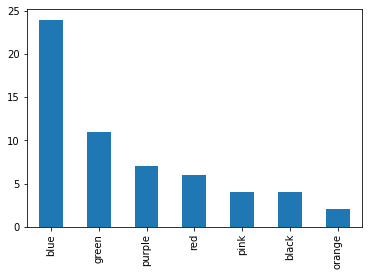

In [21]:
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_student_survey = pd.read_csv(url_1)
df_student_survey["What is your favorite color?"] = df_student_survey["What is your favorite color?"].str.lower()

def color_to_categories(c):
  if c in ["blue", "blue and black", "navy", "navy blue", "royal blue", "blue/indigo", "teal", "light blue", "turquoise"]:
    return "blue"
  elif c in ["green", "forest green", "dark green"]:
    return "green"
  elif c in ["purple", "magenta"]:
    return "purple"
  elif c in ["red"]:
    return "red"
  elif c in ["pink", "light pink"]:
    return "pink"
  elif c in ["black", "grey", "gray"]:
    return "black"
  else:
    return "orange"

df_student_survey["cleaned colors"] = df_student_survey["What is your favorite color?"].map(color_to_categories)
df_student_survey["cleaned colors"].value_counts().plot.bar()

After cleaning the data by categorizing each color into a ROYGBIV category, I was able to produced this cleaned up distribution of favorite colors for students in class. Blue is by far the favorite choice, with the next top choice being green with less than half of blue's total. After that, each cateogry becomes closer together, with pink and black being equal as well. The least favorite choice was orange, with just 1 choice (technically 1/2 a choice since the full response was "Orange and Blue").

**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

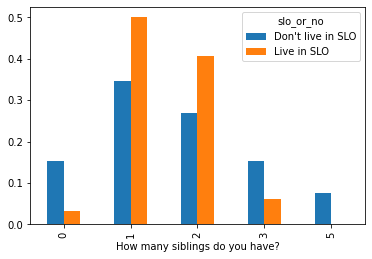

In [3]:
def slo_or_not(c):
  if c in ["Off Campus, but in SLO", "On-Campus housing"]:
    return "Live in SLO"
  else:
    return "Don't live in SLO"

df_student_survey["slo_or_no"] = df_student_survey["Where are you living this quarter?"].map(slo_or_not)
joint_sibs_living = pd.crosstab(df_student_survey["How many siblings do you have?"], df_student_survey["slo_or_no"], normalize=True)
living = joint_sibs_living.sum(axis=0)
cond_sibs_living = joint_sibs_living.divide(living, axis=1)
cond_sibs_living.plot.bar()

From the results made above, we can see that both living groups seem to follow a similar distribution of number of siblings. While both have the highest proportion in the 1 sibling category, we can see that those who don't live in SLO have a less drastic variation in categories compared to those who do live in SLO. Compared to those who live in in SLO, the proportion of those who don't live in SLO either have 5 siblings or are only children at a much higher rate. Interestingly enough, there are multiple observations of people with 5 siblings and both observations also are not living in SLO either. All in all, those who are living in SLO have a narrower distribution of sibling count compared to those who live outside of SLO. Those living in SLO tend to mostly have either 1 or 2 siblings, while those living outside of SLO can range anywhere from 0-5 siblings.



**TYPE YOUR WRITTEN EXPLANATION HERE.**

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

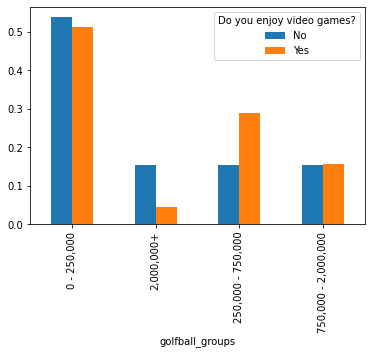

In [8]:
def golfballs_to_groups(c):
  if c <= 250000:
    return "0 - 250,000"
  elif c <= 750000:
    return "250,000 - 750,000"
  elif c <= 2000000:
    return "750,000 - 2,000,000"
  else:
    return "2,000,000+"

#Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?
golfball_question = "Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"
df_student_survey["golfball_groups"] = df_student_survey[golfball_question].map(golfballs_to_groups)
df_student_survey["golfball_groups"]
golfball_groups_counts = df_student_survey["golfball_groups"].value_counts()
joint_golfball_games = pd.crosstab(df_student_survey["golfball_groups"], df_student_survey["Do you enjoy video games?"], normalize=True)

videogames = joint_golfball_games.sum(axis=0)
cond_golfball_games = joint_golfball_games.divide(videogames, axis=1)
cond_golfball_games.plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.**

I have seemed to have found an interesting relationship between subgroups of golfball estimates and whether or not people enjoy video games. As present in the graph, we can see a significant number of students estimated that 250,000 golf balls or less could fit in a school bus. Regardless of their video game enjoyment, this was the largest group. However, as we get into higher groups, we can see different results start to emerge. In each subgroup, we can see the proportion of students who don't play video games is equal. On the other hand, for students who enjoy video games, there is a specific spike in the 250,000-750,000 range.

A possible reason we can believe to see these specific results is the creative differences between people who enjoy and who don't enjoy video games. It seems to be understood that in general, people who play video games regularly tend to be more creative and insightful. To assist in furthering my point, we can see from the website giving estimated answers to the golfball questions that a noticable majority of them were in the 250,000-750,000 range. Thus, it can be insinuated that those who enjoy video games are more creative and therefore would give a more scientific based answer rather than a random guess. This can also reinforce the point that the less creative people who don't enjoy video games would give more of a guess based approach, which is why the distribution of guesses are more evenly spread.

While the 0-250,000 range might contain the most in both groups, the difference in proportions for the other three subgroups of golf categories does certainly tell an interesting story.

## Question 4

Write and answer your own question using this data set.

The question I decided to ask myself is: "Is there a relationship between one's major and whether or not they consider themselves artistic?".

Visualize the results and discuss them below.

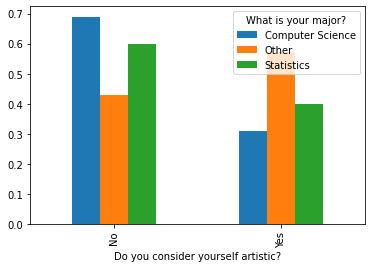

In [26]:
joint_major_artistic = pd.crosstab(df_student_survey["What is your major?"], df_student_survey["Do you consider yourself artistic?"], normalize=True)
major = joint_major_artistic.sum(axis=1)
cond_artistic_major = joint_major_artistic.divide(major, axis=0)
cond_artistic_major.T.plot.bar()

With my results, I decided to create a conditional graph where we see the proportions of whether or not someone considers themselves aritstic given their major. With that in mind, some interesting results have presented themself above. We can see that most Computer Science and Statistic majors do not consider themselves artistic, and adversely that most other majors do indeed consider themselves artistic. 

Perhaps we can understand why the results look like this based on the preface of the major each observation was in. For most computational and quantitative majors like Computer Science and Statistics, it would be reasonable to assume that they would not consider themselves artistic since a large majority of their thinking is very logical and formulaic. It would be hard to consider oneself to be artistic when a majority of your learning and curriculum is centered around formulas and algorithms. On the other hand, in other majors who could be likely to take DATA 301, such as engineering or architecture, they might find themselves being more creative. With more critical thinking and creative projects, many of these students in other majors would be more likely to consider themselves creative based on their learning.